In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

100%|██████████| 170498071/170498071 [00:01<00:00, 104208381.16it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


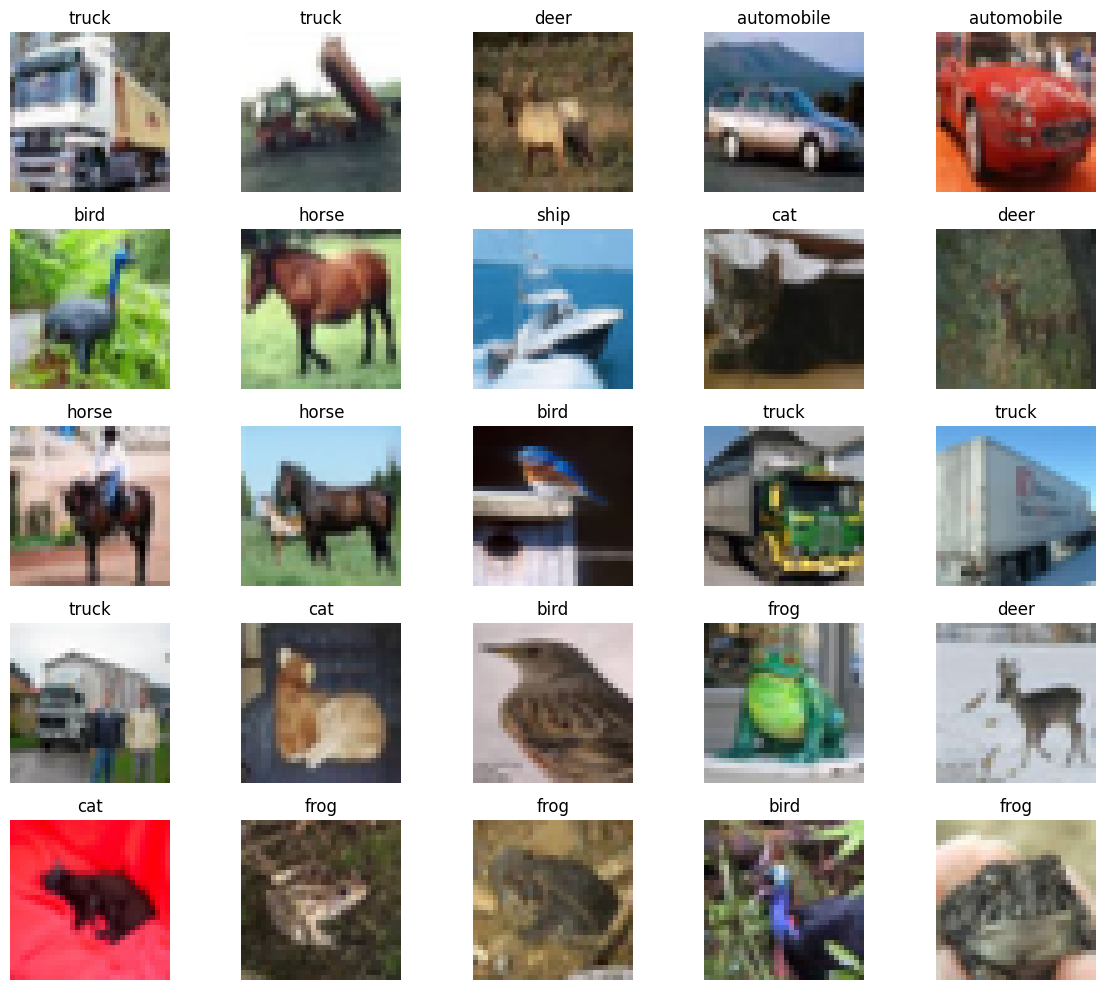

In [5]:
visualize_images(sample,(5,5))

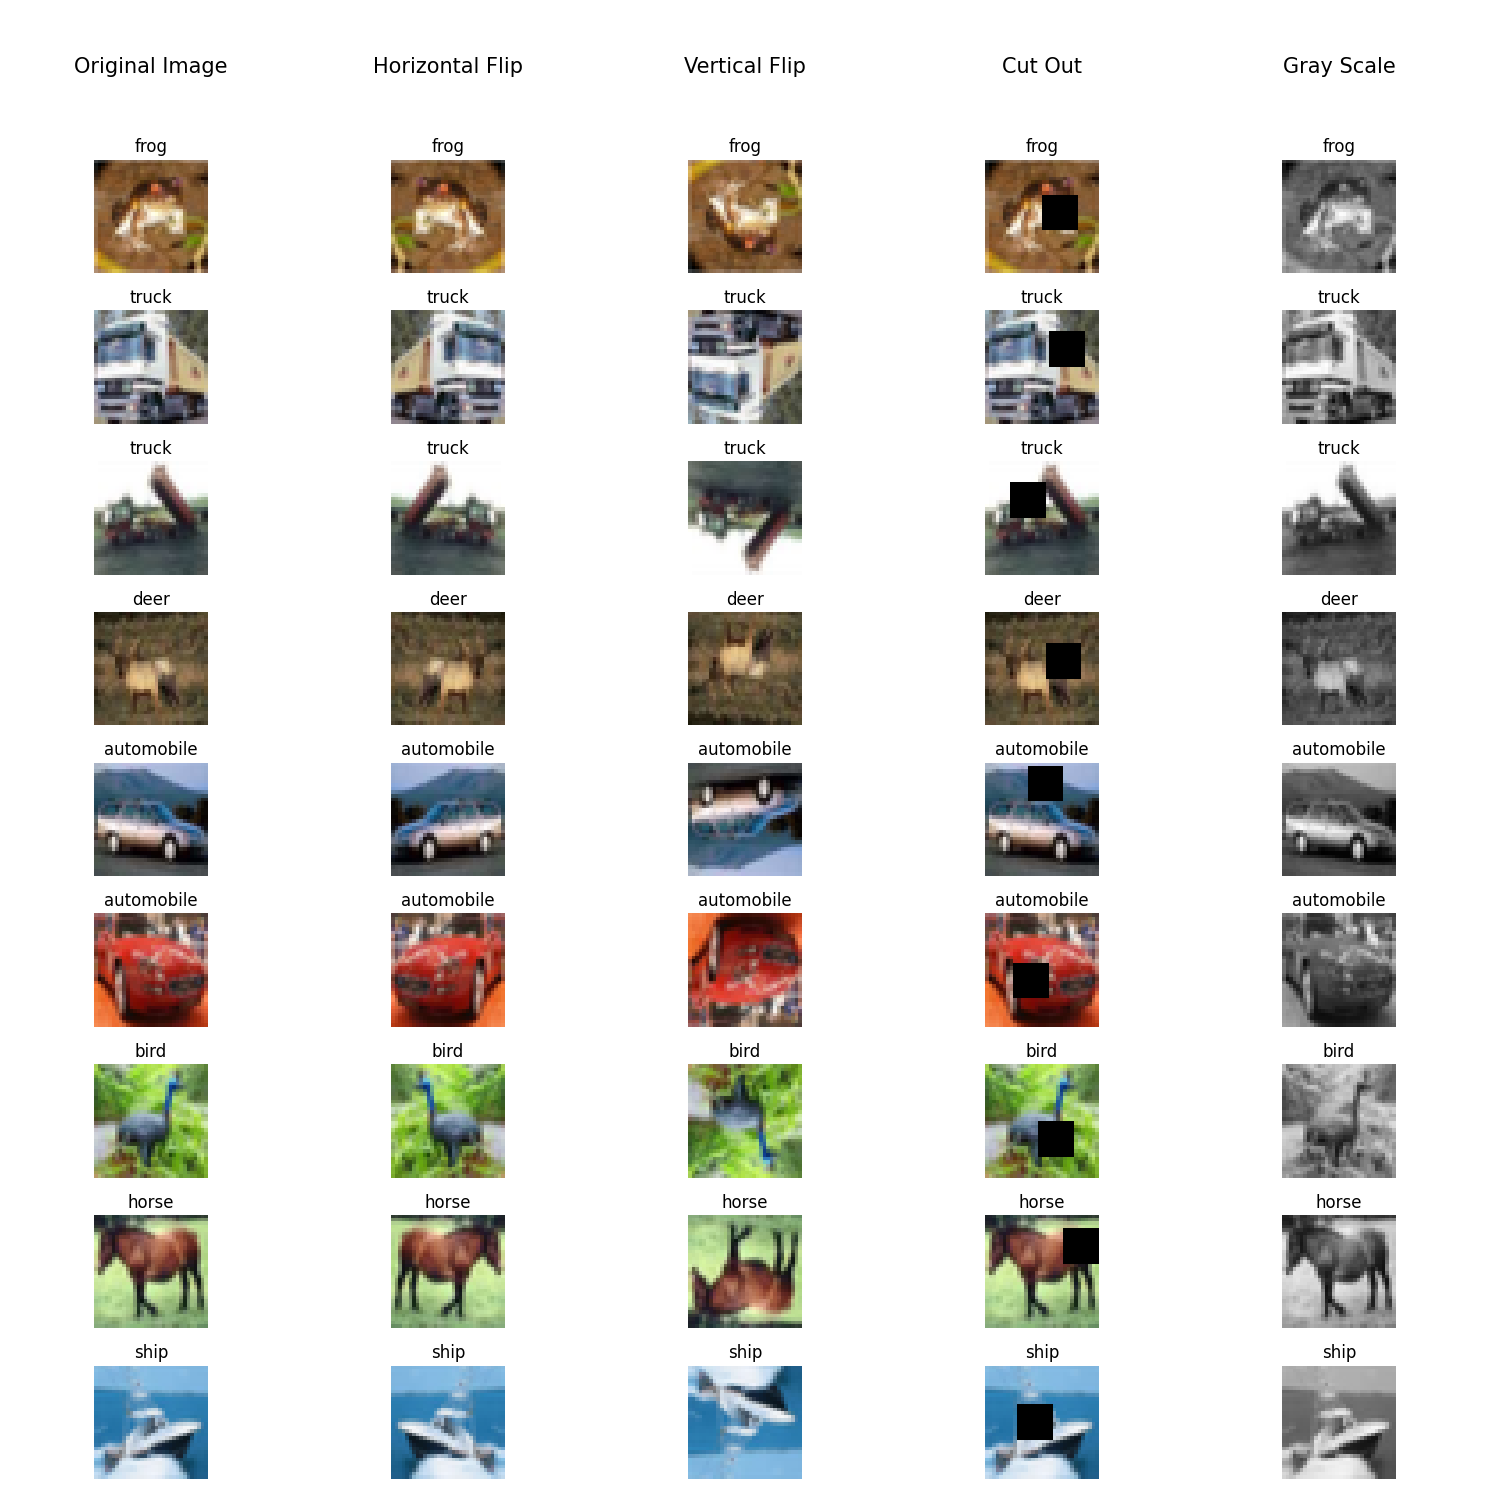

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="bn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
       BatchNorm2d-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
       BatchNorm2d-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
      BatchNorm2d-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 18,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.8651 Batch_id=1562 Accuracy=32.04: 100%|██████████| 1563/1563 [00:29<00:00, 52.67it/s]


Test set: Average loss: 1.4366, Accuracy: 4747/10000 (47.47%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.4520 Batch_id=1562 Accuracy=42.17: 100%|██████████| 1563/1563 [00:28<00:00, 54.60it/s]


Test set: Average loss: 1.2800, Accuracy: 5367/10000 (53.67%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.4312 Batch_id=1562 Accuracy=45.97: 100%|██████████| 1563/1563 [00:28<00:00, 54.11it/s]


Test set: Average loss: 1.1645, Accuracy: 5838/10000 (58.38%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.9781 Batch_id=1562 Accuracy=48.78: 100%|██████████| 1563/1563 [00:29<00:00, 53.17it/s]


Test set: Average loss: 1.0871, Accuracy: 6162/10000 (61.62%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.4014 Batch_id=1562 Accuracy=50.97: 100%|██████████| 1563/1563 [00:28<00:00, 54.84it/s]


Test set: Average loss: 1.0639, Accuracy: 6194/10000 (61.94%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.7486 Batch_id=1562 Accuracy=52.95: 100%|██████████| 1563/1563 [00:28<00:00, 54.67it/s]


Test set: Average loss: 0.9934, Accuracy: 6469/10000 (64.69%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.6794 Batch_id=1562 Accuracy=54.30: 100%|██████████| 1563/1563 [00:28<00:00, 54.45it/s]


Test set: Average loss: 0.9574, Accuracy: 6645/10000 (66.45%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.4777 Batch_id=1562 Accuracy=55.20: 100%|██████████| 1563/1563 [00:28<00:00, 54.80it/s]


Test set: Average loss: 0.9351, Accuracy: 6740/10000 (67.40%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.4306 Batch_id=1562 Accuracy=56.39: 100%|██████████| 1563/1563 [00:28<00:00, 54.54it/s]


Test set: Average loss: 0.8859, Accuracy: 6891/10000 (68.91%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.5716 Batch_id=1562 Accuracy=56.74: 100%|██████████| 1563/1563 [00:28<00:00, 54.11it/s]


Test set: Average loss: 0.8706, Accuracy: 6935/10000 (69.35%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=1.1054 Batch_id=1562 Accuracy=57.56: 100%|██████████| 1563/1563 [00:28<00:00, 54.09it/s]


Test set: Average loss: 0.8546, Accuracy: 7080/10000 (70.80%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=1.2458 Batch_id=1562 Accuracy=57.86: 100%|██████████| 1563/1563 [00:28<00:00, 54.51it/s]


Test set: Average loss: 0.8738, Accuracy: 6933/10000 (69.33%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=1.2830 Batch_id=1562 Accuracy=58.93: 100%|██████████| 1563/1563 [00:28<00:00, 54.67it/s]


Test set: Average loss: 0.8373, Accuracy: 7060/10000 (70.60%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=0.9392 Batch_id=1562 Accuracy=58.83: 100%|██████████| 1563/1563 [00:28<00:00, 54.67it/s]


Test set: Average loss: 0.8226, Accuracy: 7152/10000 (71.52%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=1.2840 Batch_id=1562 Accuracy=59.44: 100%|██████████| 1563/1563 [00:28<00:00, 54.58it/s]


Test set: Average loss: 0.8227, Accuracy: 7155/10000 (71.55%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.5840 Batch_id=1562 Accuracy=59.89: 100%|██████████| 1563/1563 [00:28<00:00, 54.70it/s]


Test set: Average loss: 0.8213, Accuracy: 7135/10000 (71.35%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=0.9652 Batch_id=1562 Accuracy=59.81: 100%|██████████| 1563/1563 [00:28<00:00, 55.44it/s]


Test set: Average loss: 0.8155, Accuracy: 7172/10000 (71.72%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=1.2485 Batch_id=1562 Accuracy=60.26: 100%|██████████| 1563/1563 [00:28<00:00, 54.43it/s]


Test set: Average loss: 0.7873, Accuracy: 7236/10000 (72.36%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.5130 Batch_id=1562 Accuracy=60.39: 100%|██████████| 1563/1563 [00:28<00:00, 54.57it/s]


Test set: Average loss: 0.7968, Accuracy: 7222/10000 (72.22%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.3370 Batch_id=1562 Accuracy=60.79: 100%|██████████| 1563/1563 [00:28<00:00, 54.85it/s]


Test set: Average loss: 0.8006, Accuracy: 7209/10000 (72.09%)

Adjusting learning rate of group 0 to 6.0016e-04.


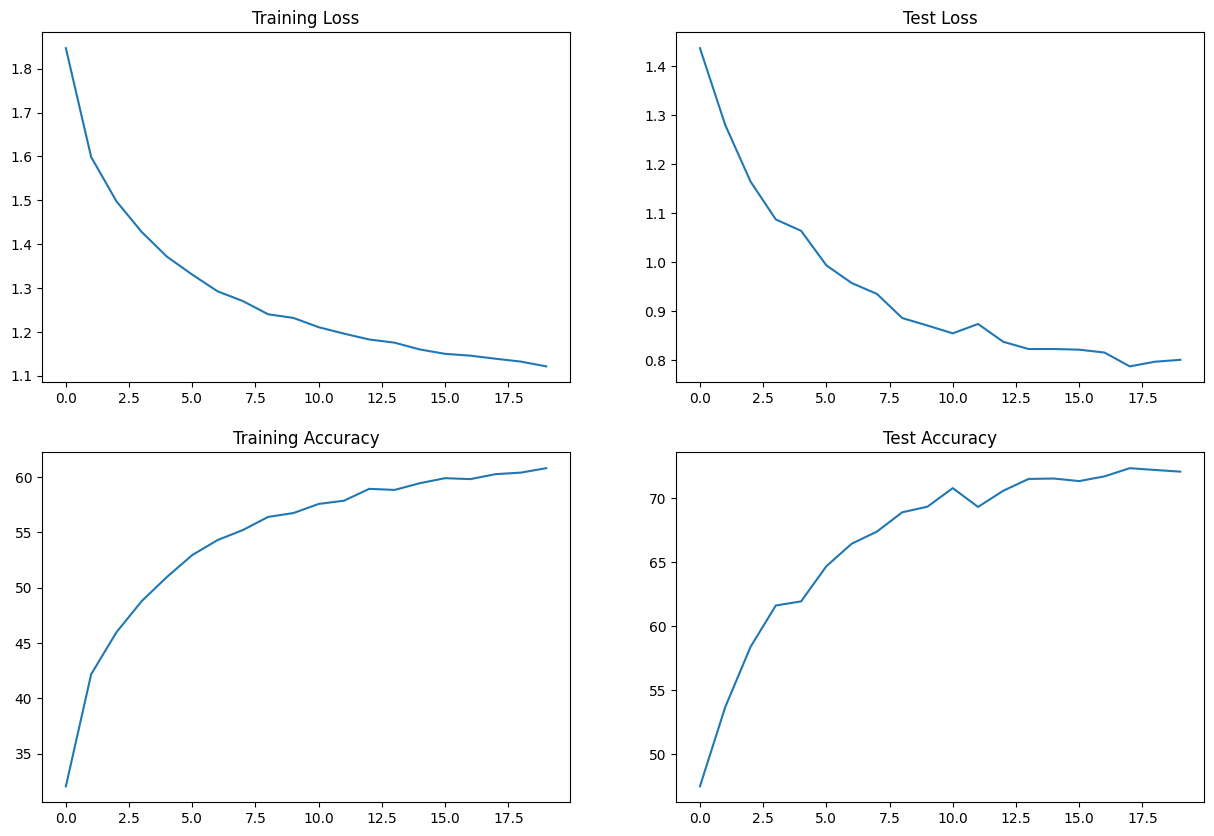

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

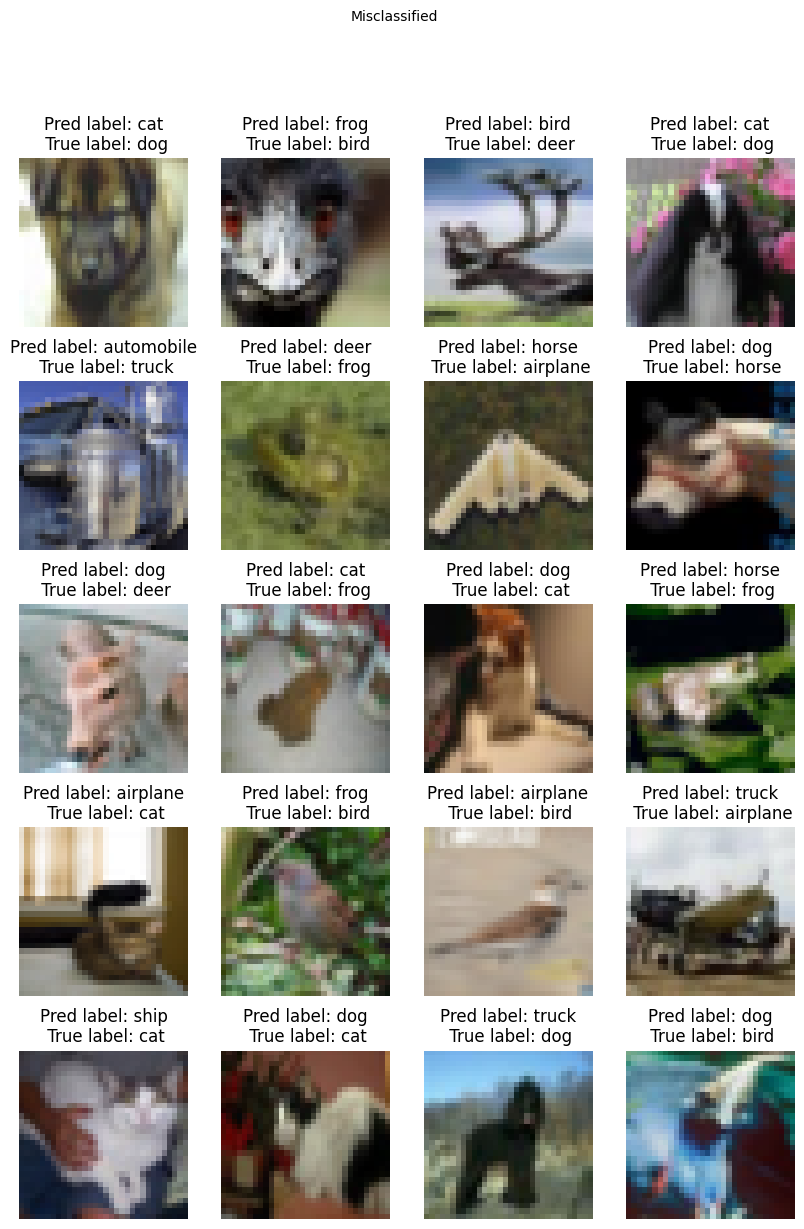

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 78 %

Accuracy of automobile : 89 %

Accuracy of  bird : 46 %

Accuracy of   cat : 48 %

Accuracy of  deer : 66 %

Accuracy of   dog : 63 %

Accuracy of  frog : 78 %

Accuracy of horse : 83 %

Accuracy of  ship : 79 %

Accuracy of truck : 84 %
{'airplane': 78.80794701986756, 'automobile': 89.96655518394648, 'bird': 46.42857142857143, 'cat': 48.37662337662338, 'deer': 66.35514018691589, 'dog': 63.89776357827476, 'frog': 78.61842105263158, 'horse': 83.97435897435898, 'ship': 79.04761904761905, 'truck': 84.6875}


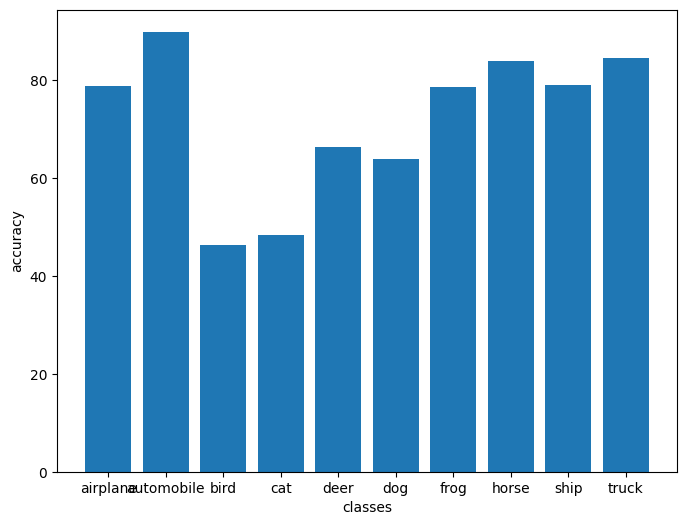

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)